In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df_country = pd.read_csv('Data_Negara_HELP.csv')
df = df_country.set_index('Negara')
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [60]:
df.isnull().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

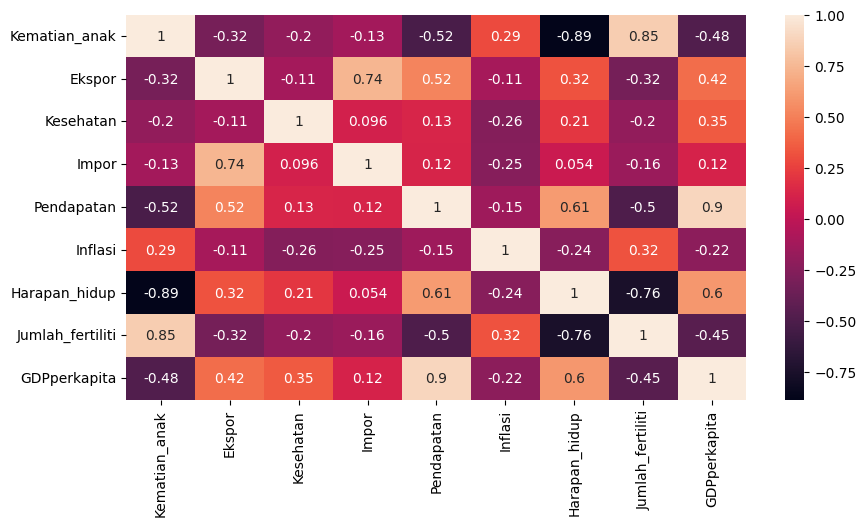

In [61]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='Kesehatan'>

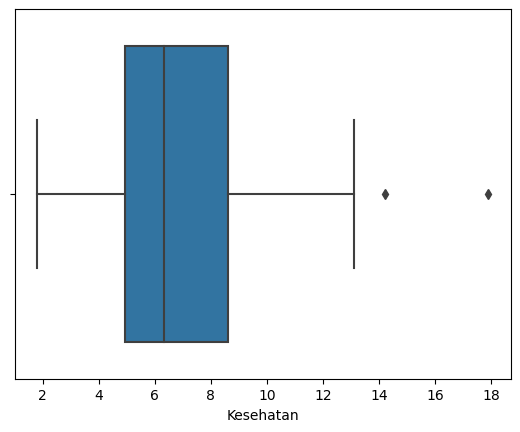

In [62]:
sns.boxplot(x='Kesehatan', data=df)

<Axes: xlabel='Pendapatan'>

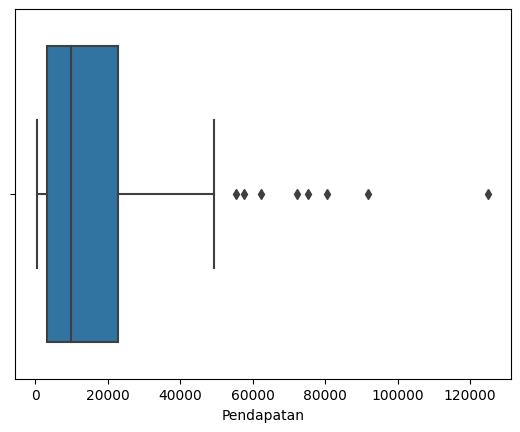

In [63]:
sns.boxplot(x='Pendapatan', data=df)

In [64]:
import pandas as pd
from scipy.stats.mstats import winsorize

dfbaru =pd.DataFrame(data = df, columns = ['Negara', 'Kesehatan', 'Pendapatan'])

dfbaru['Kesehatan'] = winsorize(dfbaru['Kesehatan'], limits =[0.05, 0.05])  
dfbaru['Pendapatan'] = winsorize(dfbaru['Pendapatan'], limits = [0.05, 0.05]) 

country = dfbaru.set_index('Negara') 
country

,Kesehatan,Pendapatan
Negara,,
NaN,7.58,1610
NaN,6.55,9930
NaN,4.17,12900
NaN,2.85,5900
NaN,6.03,19100
...,...,...
NaN,5.25,2950
NaN,4.91,16500
NaN,6.84,4490


<Axes: xlabel='Kesehatan'>

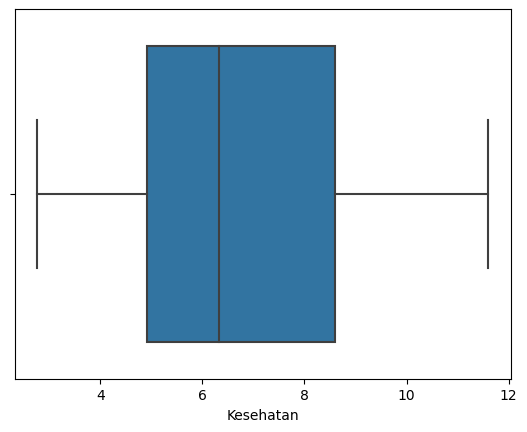

In [65]:
sns.boxplot(x='Kesehatan', data=dfbaru)

<Axes: xlabel='Pendapatan'>

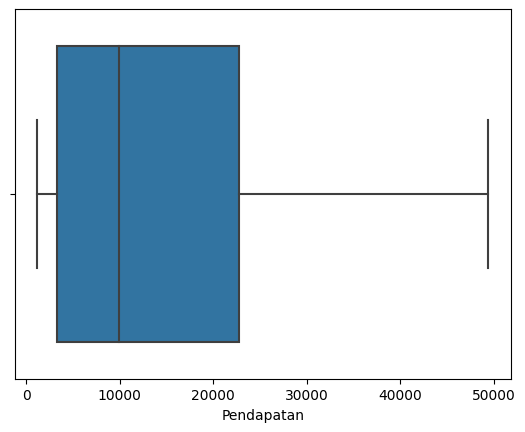

In [66]:
sns.boxplot(x='Pendapatan', data=dfbaru)

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


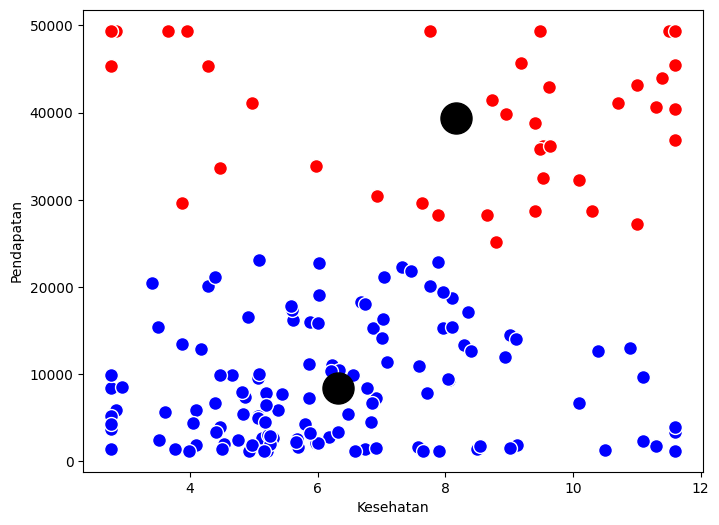

In [67]:
from tables.tests.common import ne
kmeans1 = KMeans(n_clusters = 2, random_state = 40).fit(country)
labels = kmeans1.labels_

df_baru = pd.DataFrame(data = country, columns = ['Kesehatan', 'Pendapatan'])
df_baru['label_kmeans1'] = labels

plt.figure(figsize = (8,6))
plt.scatter(df_baru.Kesehatan[df_baru.label_kmeans1 == 0], df_baru['Pendapatan'][df_baru.label_kmeans1 == 0], c = 'red', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Kesehatan[df_baru.label_kmeans1 == 1], df_baru['Pendapatan'][df_baru.label_kmeans1 == 1], c = 'blue', s = 100, edgecolor = 'w', linestyle = '-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'k', s = 500)
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

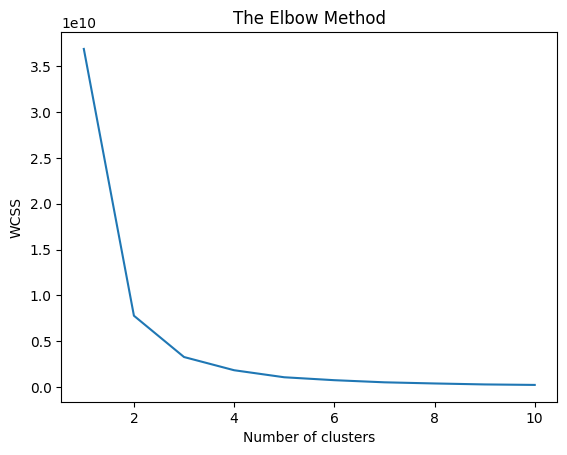

In [68]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=40)
    kmeans.fit(country)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=40).fit(df_baru)

kmeans2.labels_

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 0, 2, 2, 0, 3, 3, 2, 2, 3, 0, 2, 2, 3, 0, 0, 0, 0, 0, 2,
       2, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 0, 0, 0, 1, 0, 2, 0, 3, 1, 2, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 2, 2, 3, 1, 1, 0, 1, 0, 2, 0, 0, 3, 0, 0, 2, 2, 0,
       0, 1, 2, 3, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 3, 3, 0, 2, 0, 0, 0, 2, 1, 3, 2, 2, 0, 0, 3, 0, 2, 2,
       0, 3, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 3, 1, 3, 2, 0, 0, 2, 0, 0, 0])

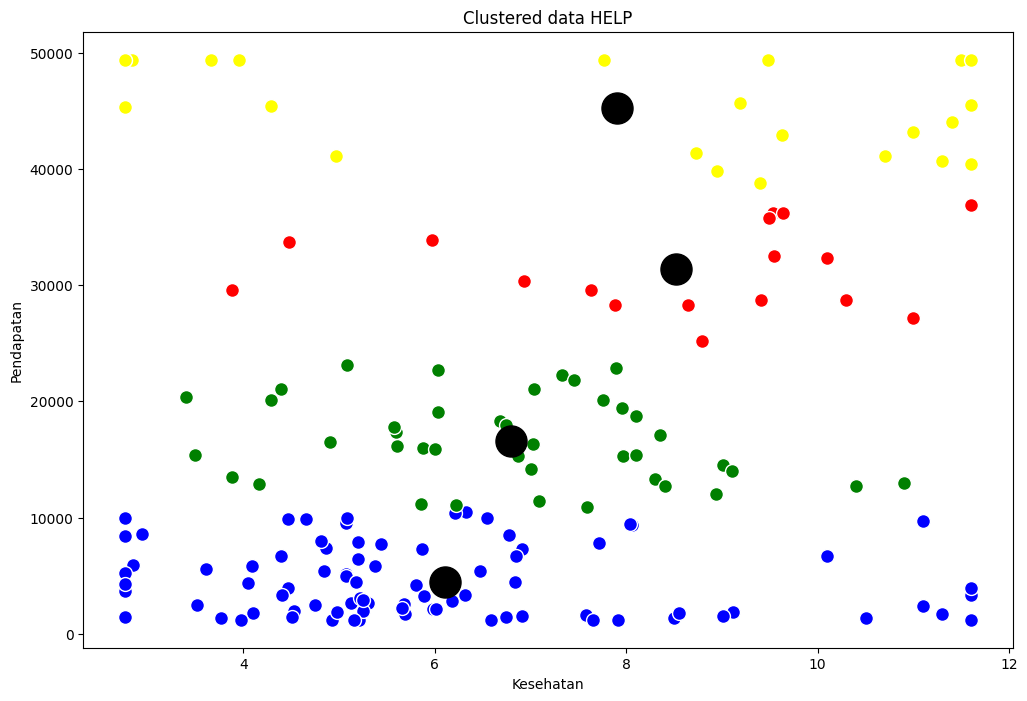

In [70]:
labels2 = kmeans2.labels_
df_baru['label_kmeans2'] = labels2

plt.figure(figsize = (12,8))
plt.scatter(df_baru.Kesehatan[df_baru.label_kmeans2 == 0], df_baru['Pendapatan'][df_baru.label_kmeans2 == 0], c = 'blue', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Kesehatan[df_baru.label_kmeans2 == 1], df_baru['Pendapatan'][df_baru.label_kmeans2 == 1], c = 'red', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Kesehatan[df_baru.label_kmeans2 == 2], df_baru['Pendapatan'][df_baru.label_kmeans2 == 2], c = 'green', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Kesehatan[df_baru.label_kmeans2 == 3], df_baru['Pendapatan'][df_baru.label_kmeans2 == 3], c = 'yellow', s = 100, edgecolor = 'w', linestyle = '-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'k', s = 500)
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.title('Clustered data HELP')
plt.show()



In [57]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_baru, labels=labels1))
print(silhouette_score(df_baru, labels=labels2))

0.7071165864996846
0.6322053156776892


In [72]:
help = pd.DataFrame(data = df_baru, columns=['Pendapatan', 'Kesehatan', 'label_kmeans1', 'label_kmeans2'])
help['Pendapatan(real)'] = df['Pendapatan'] 
help['Kesehatan(real)'] = df['Kesehatan']

Pendapatanrendah = help['label_kmeans2'] == 0
Kesehatanrendah = help['label_kmeans2'] == 0
bantuan = help[(Pendapatanrendah) & (Kesehatanrendah)]

Plow = bantuan['Pendapatan(real)'] < bantuan['Pendapatan(real)'].mean()
Klow = bantuan['Kesehatan(real)'] < bantuan['Kesehatan(real)'].mean()
HELP = bantuan[(Plow) & (Klow)]

HELP_sort = HELP.sort_values(by = ['Pendapatan(real)', 'Kesehatan(real)'], ascending = True)
HELP_sort

,Pendapatan,Kesehatan,label_kmeans1,label_kmeans2,Pendapatan(real),Kesehatan(real)
Negara,,,,,,
